# **Week 6 Task** - Credit Card Fraud Detection
---
---

### **Installing required libraries**

In [ ]:
!pip install minisom

  Created wheel for minisom: filename=MiniSom-2.2.9-py3-none-any.whl size=8594 sha256=783cbfc204b5070a16ef83d8e6096a56ef708cc1f8989310360afb3b06c82712
  Stored in directory: /root/.cache/pip/wheels/3d/a1/10/f50b6f4865652eac239a2700de411c3078c27e1318320e494c
Successfully built minisom


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Import Libraries and the dataset**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
from pylab import bone, pcolor, colorbar, plot, show
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Cureya Internship/Credit_Card_Applications.csv')
df

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [ ]:
df.head(10)

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
5,15571121,0,15.83,0.585,2,8,8,1.500,1,1,2,0,2,100,1,1
6,15726466,1,17.42,6.500,2,3,4,0.125,0,0,0,0,2,60,101,0
7,15660390,0,58.67,4.460,2,11,8,3.040,1,1,6,0,2,43,561,1
8,15663942,1,27.83,1.000,1,2,8,3.000,0,0,0,0,2,176,538,0
9,15638610,0,55.75,7.080,2,4,8,6.750,1,1,3,1,2,100,51,0


In [ ]:
df.tail(10)

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
680,15790689,1,21.17,0.000,2,8,4,0.500,0,0,0,1,1,0,1,0
681,15665181,1,35.25,16.500,1,8,4,4.000,1,0,0,0,2,80,1,0
682,15633608,0,22.92,11.585,2,13,4,0.040,1,0,0,0,2,80,1350,1
683,15805261,0,48.17,1.335,2,3,7,0.335,0,0,0,0,2,0,121,0
684,15740356,1,43.00,0.290,1,13,8,1.750,1,1,8,0,2,100,376,1
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1
689,15592412,1,41.00,0.040,2,10,4,0.040,0,1,1,0,1,560,1,1


**The attributes of this dataset are:**
<br/>
* CustomerID – Id of the customer
* A1 – categorical, possible values: 0 and 1
* A2 – continuous
* A3 – continuous
* A4 – categorical, possible values: 1, 2 and 3
* A5 – categorical, possible values: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14
* A6 – categorical, possible values: 1, 2, 3, 4, 5, 6, 7, 8, 9
* A7 – continuous
* A8 – categorical, possible values: 0 and 1
* A9 – categorical, possible values: 0 and 1
* A10 – continuous
* A11 – categorical, possible values: 0 and 1
* A12 – categorical, possible values: 1, 2 and 3
* A13 – continuous
* A14 – continuous
* Class – class attribute, possible values: 1 and 2

In [ ]:
print('Shape of Dataset : ', df.shape)

Shape of Dataset :  (690, 16)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  690 non-null    int64  
 1   A1          690 non-null    int64  
 2   A2          690 non-null    float64
 3   A3          690 non-null    float64
 4   A4          690 non-null    int64  
 5   A5          690 non-null    int64  
 6   A6          690 non-null    int64  
 7   A7          690 non-null    float64
 8   A8          690 non-null    int64  
 9   A9          690 non-null    int64  
 10  A10         690 non-null    int64  
 11  A11         690 non-null    int64  
 12  A12         690 non-null    int64  
 13  A13         690 non-null    int64  
 14  A14         690 non-null    int64  
 15  Class       690 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 86.4 KB


In [ ]:
df.describe()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
count,6.900000e+02,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,1.569047e+07,0.678261,31.568203,4.758725,1.766667,7.372464,4.692754,2.223406,0.523188,0.427536,2.40000,0.457971,1.928986,184.014493,1018.385507,0.444928
std,7.150647e+04,0.467482,11.853273,4.978163,0.430063,3.683265,1.992316,3.346513,0.499824,0.495080,4.86294,0.498592,0.298813,172.159274,5210.102598,0.497318
min,1.556571e+07,0.000000,13.750000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,1.563169e+07,0.000000,22.670000,1.000000,2.000000,4.000000,4.000000,0.165000,0.000000,0.000000,0.00000,0.000000,2.000000,80.000000,1.000000,0.000000
50%,1.569016e+07,1.000000,28.625000,2.750000,2.000000,8.000000,4.000000,1.000000,1.000000,0.000000,0.00000,0.000000,2.000000,160.000000,6.000000,0.000000
75%,1.575190e+07,1.000000,37.707500,7.207500,2.000000,10.000000,5.000000,2.625000,1.000000,1.000000,3.00000,1.000000,2.000000,272.000000,396.500000,1.000000
max,1.581544e+07,1.000000,80.250000,28.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.00000,1.000000,3.000000,2000.000000,100001.000000,1.000000


In [ ]:
df.isnull().sum()

CustomerID    0
A1            0
A2            0
A3            0
A4            0
A5            0
A6            0
A7            0
A8            0
A9            0
A10           0
A11           0
A12           0
A13           0
A14           0
Class         0
dtype: int64

### **Data Visualization**

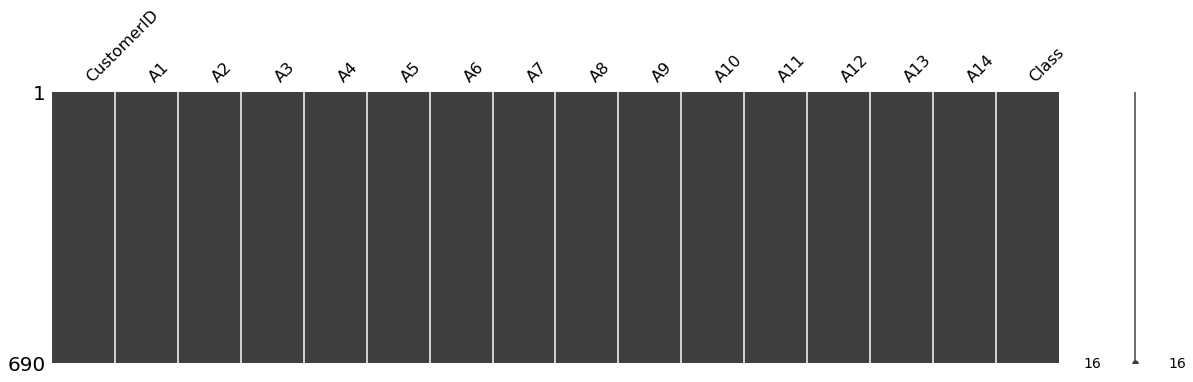

In [ ]:
msno.matrix(df,figsize=(20,5))

**Observations :**<br/>
* There is no missing data in our dataset.

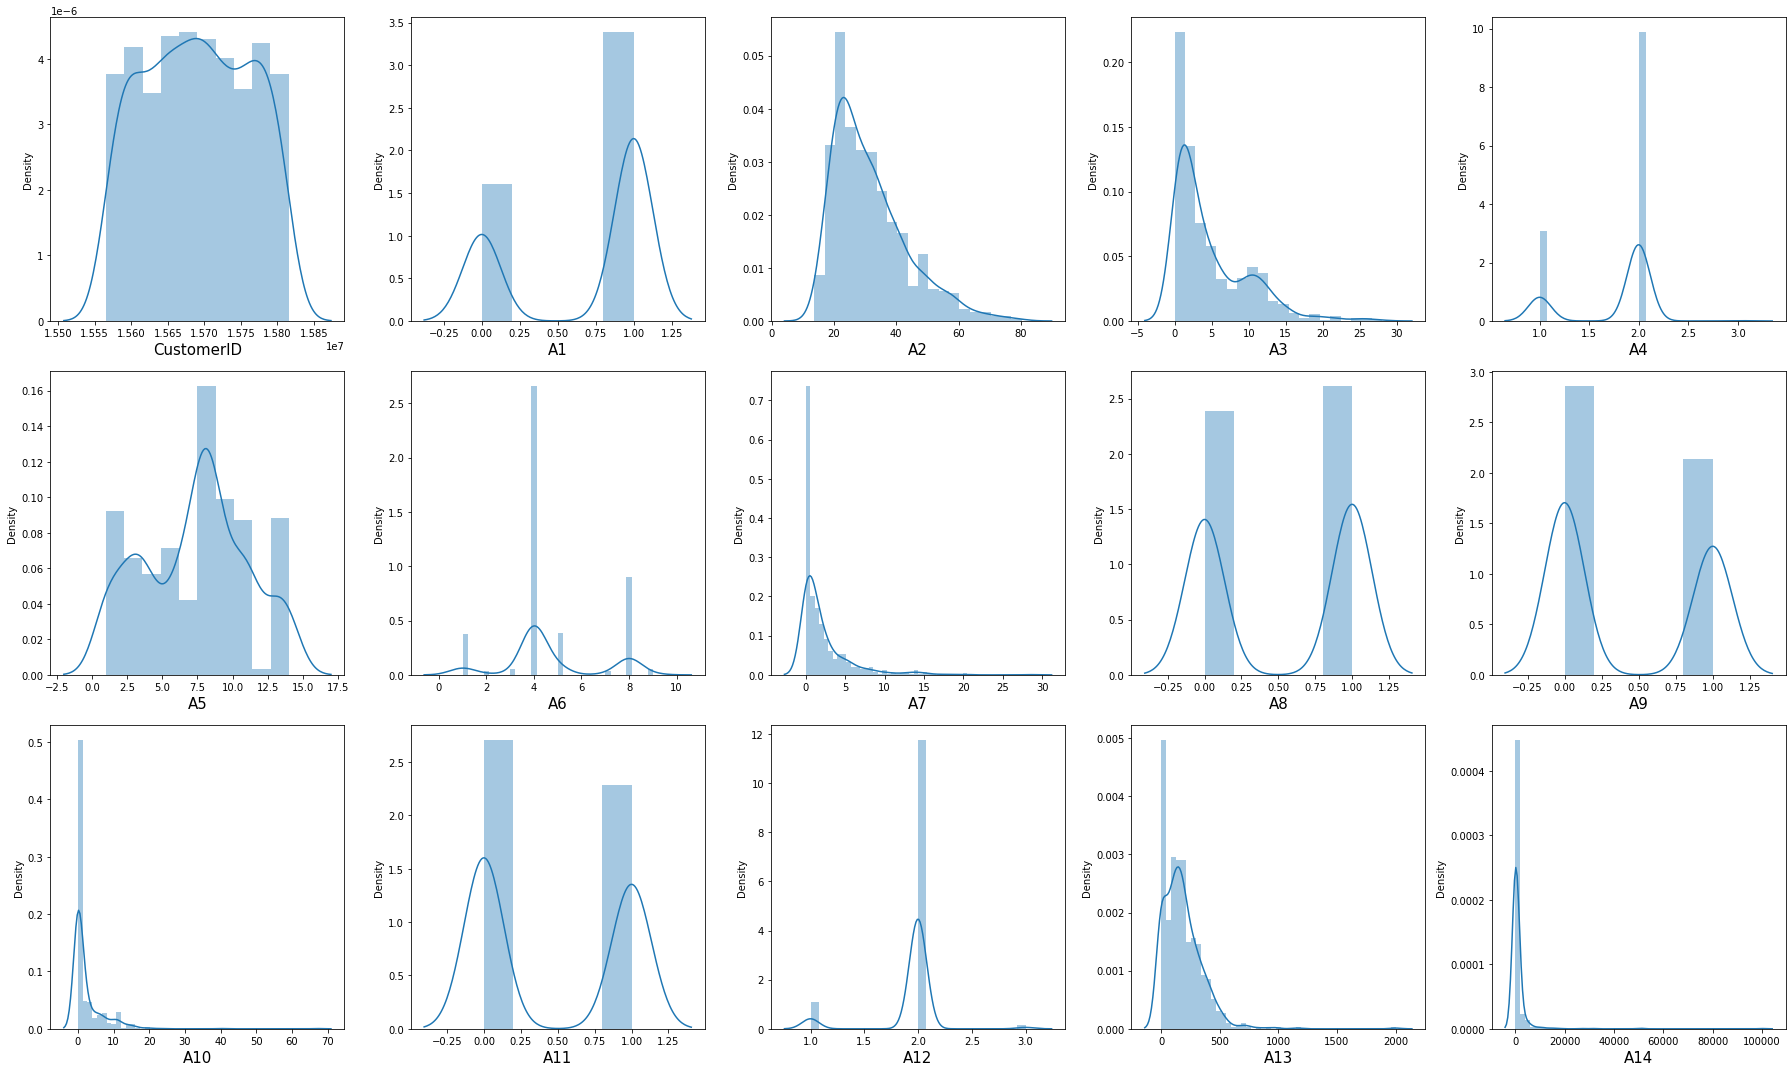

In [ ]:
plt.figure(figsize = (25, 15))
plot_no = 1

for column in df:
    if plot_no <= 15:
        ax = plt.subplot(3, 5, plot_no)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 15)
    plot_no += 1
    
plt.tight_layout()
plt.show()

### **Outliners detection and class imbalance**

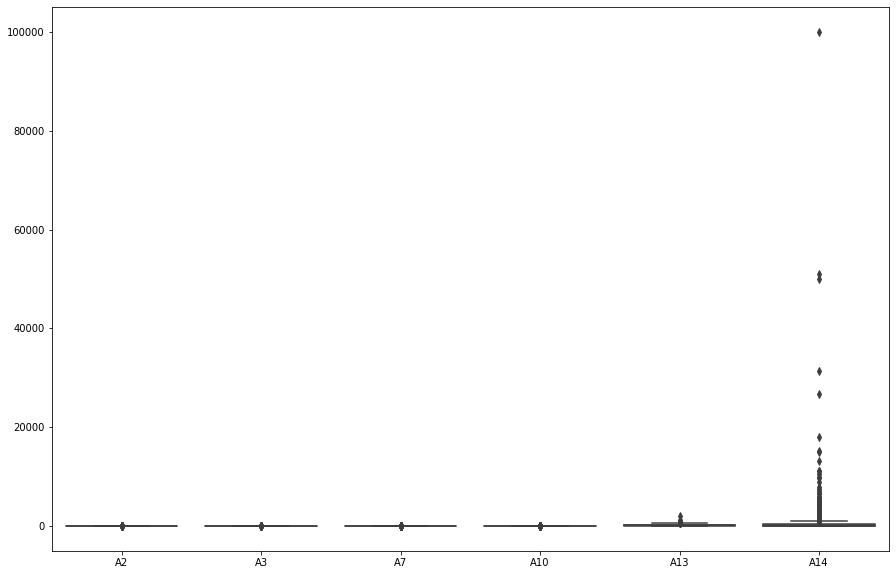

In [ ]:
continiousData = pd.DataFrame()
continousVariableList  = ["A2", "A3", "A7", "A10", "A13", "A14"]
for var in continousVariableList:
    continiousData[var] = df[var].astype("float32")

fig, axes = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(15, 10)
sns.boxplot(data=continiousData,orient="v",ax=axes)

**Observations :**<br/>
* Majority of our data is out of scale, means have to apply some sort of scaling algorithm before applying any machine learning algorithm. 
* Also, A14 is having huge fluctuations, which could be some sort of indication.

### **Correlation analysis**

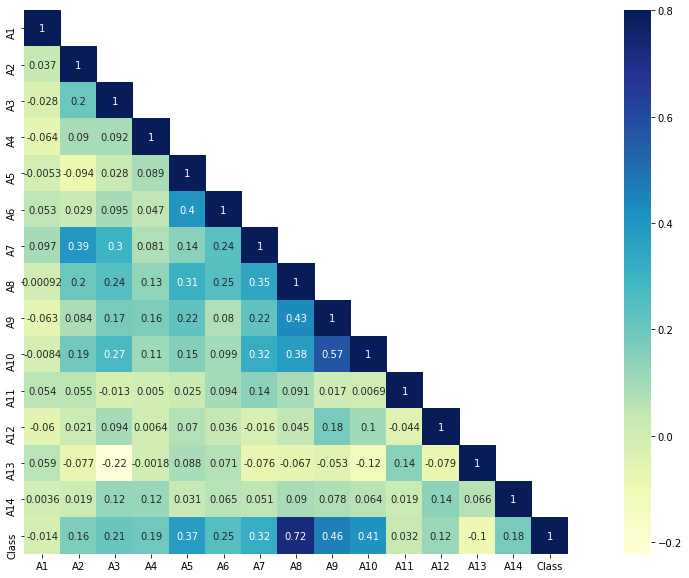

In [ ]:
corrMatt = df.iloc[:,1:].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True,cmap="YlGnBu")

**Observations :**<br/>
* There is a high correlation value between A8 feature and the final outcome.

### **Creating the subset of the independent and dependent variable**

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
print("\nValues in X:\n", X)
print("\nValues in y:\n", y)


Values in X:
 [[1.5776156e+07 1.0000000e+00 2.2080000e+01 ... 2.0000000e+00
  1.0000000e+02 1.2130000e+03]
 [1.5739548e+07 0.0000000e+00 2.2670000e+01 ... 2.0000000e+00
  1.6000000e+02 1.0000000e+00]
 [1.5662854e+07 0.0000000e+00 2.9580000e+01 ... 2.0000000e+00
  2.8000000e+02 1.0000000e+00]
 ...
 [1.5675450e+07 0.0000000e+00 1.8830000e+01 ... 2.0000000e+00
  1.0000000e+02 1.0000000e+00]
 [1.5776494e+07 0.0000000e+00 2.7420000e+01 ... 2.0000000e+00
  1.2000000e+02 1.2000000e+01]
 [1.5592412e+07 1.0000000e+00 4.1000000e+01 ... 1.0000000e+00
  5.6000000e+02 1.0000000e+00]]

Values in y:
 [0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 1
 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1
 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1 0 0
 0 0 1 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0
 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1
 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 

### **Feature Scaling : Normalization**

In [ ]:
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)
print("\nTransformed values of X:\n", X)


Transformed values of X:
 [[8.42681467e-01 1.00000000e+00 1.25263158e-01 ... 5.00000000e-01
  5.00000000e-02 1.21200000e-02]
 [6.96090562e-01 0.00000000e+00 1.34135338e-01 ... 5.00000000e-01
  8.00000000e-02 0.00000000e+00]
 [3.88981656e-01 0.00000000e+00 2.38045113e-01 ... 5.00000000e-01
  1.40000000e-01 0.00000000e+00]
 ...
 [4.39420332e-01 0.00000000e+00 7.63909774e-02 ... 5.00000000e-01
  5.00000000e-02 0.00000000e+00]
 [8.44034934e-01 0.00000000e+00 2.05563910e-01 ... 5.00000000e-01
  6.00000000e-02 1.10000000e-04]
 [1.06907888e-01 1.00000000e+00 4.09774436e-01 ... 0.00000000e+00
  2.80000000e-01 0.00000000e+00]]


**Observations :**<br/>
* There are high computations required and the data has many dimensions with lots of non linear relationships.
* Thus we scale the data to crush the impact of variable with larger weight in the analysis
* This method equalizes range and variability in the dataset

### **Training the SOM**

In [ ]:
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

### **Visualizing the results**

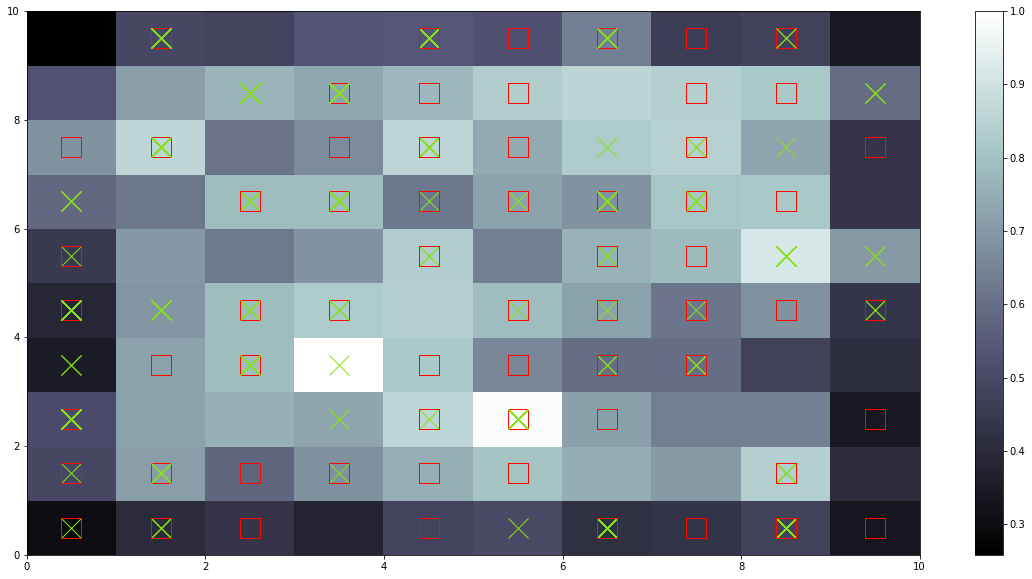

In [ ]:
plt.figure(figsize = (20,10))
bone()
pcolor(som.distance_map().T)
colorbar()

markers = ['s', 'x']
colors = ['#ff0800', '#87e11b']

for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 20,
         markeredgewidth = 1)
show()

In [ ]:
mappings = som.win_map(X)
print("\nMappings are:\n", mappings)


Mappings are:
 defaultdict(<class 'list'>, {(4, 2): [array([0.84268147, 1.        , 0.12526316, 0.40928571, 0.5       ,
       0.23076923, 0.375     , 0.05561404, 0.        , 0.        ,
       0.        , 1.        , 0.5       , 0.05      , 0.01212   ]), array([0.8735269 , 1.        , 0.29819549, 0.00892857, 0.5       ,
       0.15384615, 0.5       , 0.14035088, 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.21      , 0.        ]), array([0.98014648, 1.        , 0.30706767, 0.09821429, 0.5       ,
       0.15384615, 0.5       , 0.0877193 , 0.        , 0.        ,
       0.        , 1.        , 0.5       , 0.116     , 0.002     ]), array([0.88702153, 1.        , 0.12150376, 0.055     , 0.5       ,
       0.23076923, 0.375     , 0.00298246, 0.        , 0.        ,
       0.        , 1.        , 0.5       , 0.178     , 0.        ]), array([0.59042402, 1.        , 0.20556391, 0.44642857, 0.5       ,
       0.38461538, 0.5       , 0.00877193, 0.        , 0.        ,


**Observations :**<br/>
* The outlying winning node we recognized from the map was at the position (5,2).
* Here we get a list of all the customers associated to this WN, i.e all the cheaters.
* The values are scaled hence its hard to recognize them.

In [ ]:
frauds = mappings[(5,2)]
frauds = sc.inverse_transform(frauds)
print("\nFrauds customers are:\n\n",frauds)


Frauds customers are:

 [[1.5766183e+07 0.0000000e+00 2.4500000e+01 5.0000000e-01 2.0000000e+00
  1.1000000e+01 8.0000000e+00 1.5000000e+00 1.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 2.0000000e+00 2.8000000e+02 8.2500000e+02]
 [1.5684722e+07 0.0000000e+00 2.7670000e+01 1.5000000e+00 2.0000000e+00
  7.0000000e+00 4.0000000e+00 2.0000000e+00 1.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 1.0000000e+00 3.6800000e+02 1.0000000e+00]
 [1.5772329e+07 0.0000000e+00 2.8080000e+01 1.5000000e+01 1.0000000e+00
  1.0000000e+01 9.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 2.0000000e+00 0.0000000e+00 1.3213000e+04]
 [1.5734649e+07 0.0000000e+00 4.0830000e+01 1.0000000e+01 2.0000000e+00
  1.1000000e+01 8.0000000e+00 1.7500000e+00 1.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 2.0000000e+00 2.9000000e+01 8.3800000e+02]
 [1.5646082e+07 0.0000000e+00 1.8830000e+01 4.4150000e+00 1.0000000e+00
  8.0000000e+00 8.0000000e+00 3.000

In [ ]:
df_frauds = pd.DataFrame(frauds)
df_frauds

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,15766183.0,0.0,24.50,0.500,2.0,11.0,8.0,1.500,1.0,0.0,0.0,0.0,2.0,280.0,825.0
1,15684722.0,0.0,27.67,1.500,2.0,7.0,4.0,2.000,1.0,0.0,0.0,0.0,1.0,368.0,1.0
2,15772329.0,0.0,28.08,15.000,1.0,10.0,9.0,0.000,1.0,0.0,0.0,0.0,2.0,0.0,13213.0
3,15734649.0,0.0,40.83,10.000,2.0,11.0,8.0,1.750,1.0,0.0,0.0,0.0,2.0,29.0,838.0
4,15646082.0,0.0,18.83,4.415,1.0,8.0,8.0,3.000,1.0,0.0,0.0,0.0,2.0,240.0,1.0
5,15717629.0,0.0,25.17,2.875,2.0,14.0,8.0,0.875,1.0,0.0,0.0,0.0,2.0,360.0,1.0
6,15757188.0,0.0,20.83,3.000,2.0,6.0,4.0,0.040,1.0,0.0,0.0,0.0,2.0,100.0,1.0
7,15604536.0,0.0,20.50,11.835,2.0,8.0,8.0,6.000,1.0,0.0,0.0,0.0,2.0,340.0,1.0
8,15635598.0,0.0,24.58,0.670,2.0,6.0,8.0,1.750,1.0,0.0,0.0,0.0,2.0,400.0,1.0
9,15647191.0,0.0,32.33,0.540,2.0,13.0,4.0,0.040,1.0,0.0,0.0,0.0,2.0,440.0,11178.0


**Observations :**<br/>
* Got the Customer IDs of the cheaters/fraudsters and a list of 16 such people.

In [ ]:
customers = df.iloc[:,1:].values
is_fraud = np.zeros(len(df))

for i in range(len(df)):
    if df.iloc[i, 0] in frauds:
        is_fraud[i] = 1

In [ ]:
print(is_fraud)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [ ]:
from keras.models import Sequential 
from keras.layers import Dense 

classifier = Sequential()
classifier.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'relu', input_dim = 15))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(customers, is_fraud, batch_size = 1, epochs = 5)

y_pred = classifier.predict(customers)
y_pred = np.concatenate((df.iloc[:,0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:,1].argsort()]

Epoch 1/5
690/690 [==============================] - 1s 1ms/step - loss: 0.2915 - accuracy: 0.9565
Epoch 2/5
690/690 [==============================] - 1s 1ms/step - loss: 0.1572 - accuracy: 0.9768
Epoch 3/5
690/690 [==============================] - 1s 1ms/step - loss: 0.1373 - accuracy: 0.9768
Epoch 4/5
690/690 [==============================] - 1s 1ms/step - loss: 0.1519 - accuracy: 0.9768
Epoch 5/5
690/690 [==============================] - 1s 1ms/step - loss: 0.1370 - accuracy: 0.9768


In [ ]:
df1 = pd.DataFrame(y_pred, columns=['Customers','Fraud_probability'])
df1

,Customers,Fraud_probability
0,15621423.0,0.000007
1,15799785.0,0.000013
2,15671293.0,0.000325
3,15706394.0,0.000387
4,15654859.0,0.000498
...,...,...
685,15664615.0,0.356815
686,15588123.0,0.356815
687,15725002.0,0.356815
688,15801817.0,0.356815
